In [24]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [25]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [26]:
# Check if folder tickers exists

# Define the folder name
folder_name = '../tickers'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../tickers' folder already exists.


In [27]:
# Create wiki of cryptocurrencies
wiki = pd.DataFrame(columns=['Ticker','Name','Sector'])

# Create the data for the DataFrame
new_row_df = pd.DataFrame([['BTC-EUR','Bitcoin','Cryptocurrency'],['ETH-EUR','Etherum','Cryptocurrency'],['XRP-EUR','Ripple','Cryptocurrency'],['SOL-EUR','Solana','Cryptocurrency'],['ADA-EUR','Cardano','Cryptocurrency']], columns=['Ticker','Name','Sector'])

# Append the new row to the DataFrame
wiki = pd.concat([wiki, new_row_df], ignore_index=True)
wiki

,Ticker,Name,Sector
0,BTC-EUR,Bitcoin,Cryptocurrency
1,ETH-EUR,Etherum,Cryptocurrency
2,XRP-EUR,Ripple,Cryptocurrency
3,SOL-EUR,Solana,Cryptocurrency
4,ADA-EUR,Cardano,Cryptocurrency


In [28]:
# Convert the Ticker column to a list
index_list = wiki['Ticker'].tolist()

In [29]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/5 [00:00<?, ?it/s]

In [30]:
# Get the name of the notebook
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__'])
notebook_name = notebook_name.split('-')[0]

In [31]:
# Save all the tickers data
wiki[['Name','Sector','Ticker']].to_csv(f"../tickers/{notebook_name}.csv",index=True)

In [32]:
# Configuration of different parameters of the notebook
ticker = 'BTC-EUR'
year = '2025'

In [33]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2014-09-17,355.957367,355.957367,0.0,361.468506,351.586884,359.546204,0.0,16389166
2014-09-18,328.539368,328.539368,0.0,355.505402,319.789459,355.588409,0.0,26691849
2014-09-19,307.761139,307.761139,0.0,330.936707,298.921021,328.278503,0.0,29560103
2014-09-20,318.758972,318.758972,0.0,329.978180,303.931244,307.665253,0.0,28736826
2014-09-21,310.632446,310.632446,0.0,321.504517,306.502197,318.120514,0.0,20702625
2014-09-22,312.958771,312.958771,0.0,316.469116,309.170898,310.849762,0.0,18776342
2014-09-23,339.189758,339.189758,0.0,343.704376,307.343872,312.912079,0.0,35102351
2014-09-24,331.250000,331.250000,0.0,339.307556,327.882263,339.158630,0.0,23972840
2014-09-25,322.676605,322.676605,0.0,331.444672,321.226959,331.211639,0.0,21022658


In [34]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-02-25,87386.171875,87386.171875,0.0,92108.593750,87341.789062,91920.710938,0.0,42103810505
2025-02-26,84346.398438,84346.398438,0.0,88319.031250,81811.718750,87404.281250,0.0,87580982647
2025-02-27,80422.187500,80422.187500,0.0,84989.617188,78342.992188,84253.929688,0.0,61591641630
2025-02-28,81493.085938,81493.085938,0.0,83002.140625,79938.640625,80164.593750,0.0,50663266823
2025-03-01,81297.617188,81297.617188,0.0,81964.296875,75242.281250,81494.437500,0.0,80562965278
2025-03-02,82896.046875,82896.046875,0.0,83368.562500,80739.929688,81298.437500,0.0,28126629991
2025-03-03,90516.960938,90516.960938,0.0,91608.093750,81966.429688,82900.234375,0.0,56086292370
2025-03-04,82080.570312,82080.570312,0.0,90691.179688,81123.921875,90517.031250,0.0,66827674139
2025-03-05,82103.734375,82103.734375,0.0,83686.671875,77602.953125,82079.039062,0.0,64099208419


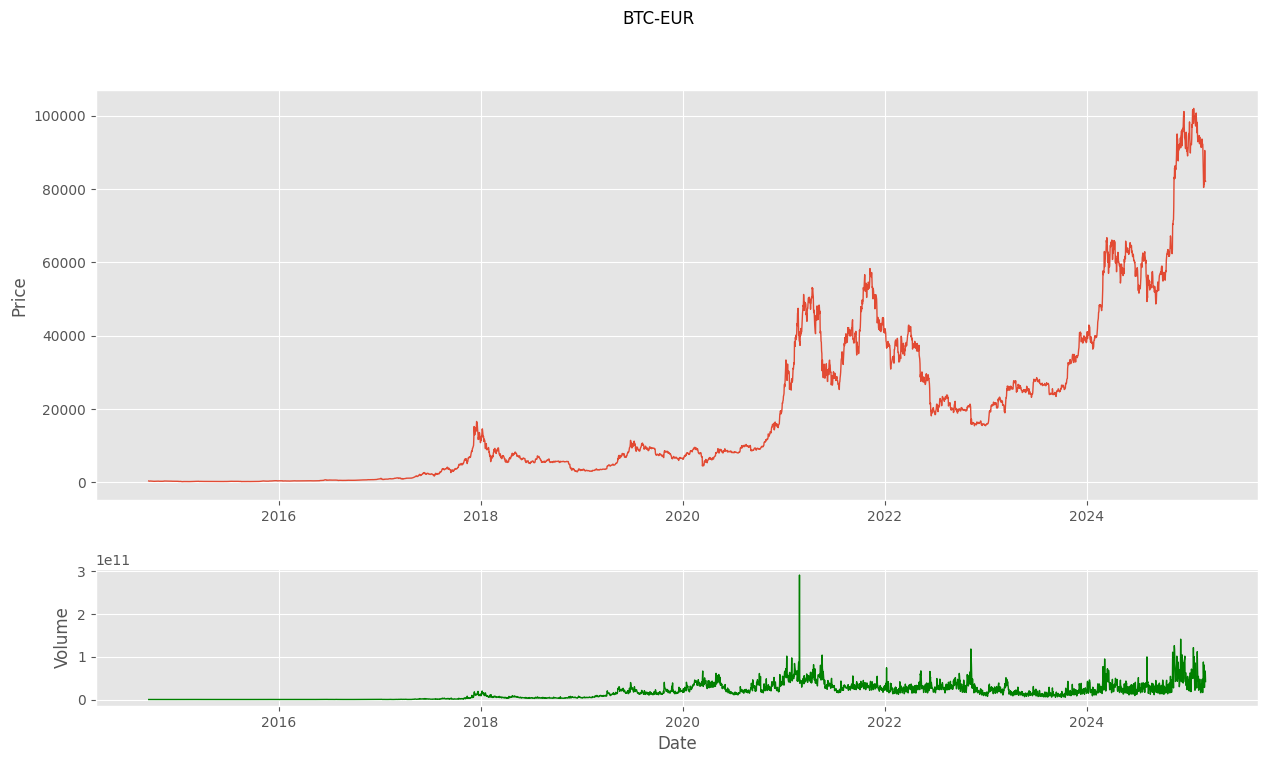

In [35]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [36]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [37]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
2014,264.709808,NaN
2015,396.616608,49.830718
2016,916.715454,131.133905
2017,11795.034180,1186.662522
2018,3256.927734,-72.387297
2019,6411.460449,96.856086
2020,23741.736328,270.301533
2021,40712.718750,71.481640
2022,15426.750000,-62.108279


In [38]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [39]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

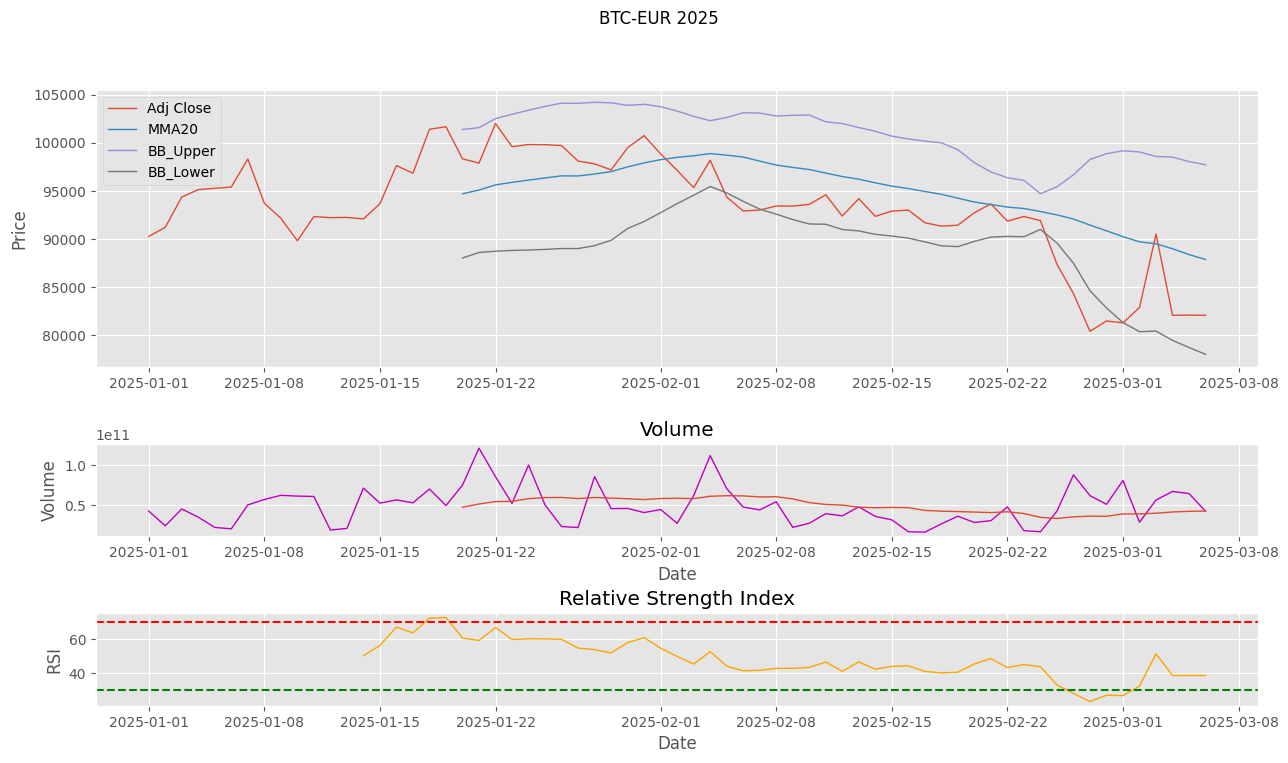

In [40]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [41]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [42]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-02-25,87386.171875,87386.171875,0.0,92108.593750,87341.789062,91920.710938,0.0,42103810505,2025,92507.870313,95421.781884,89593.958741,32.817301,-4.929107
2025-02-26,84346.398438,84346.398438,0.0,88319.031250,81811.718750,87404.281250,0.0,87580982647,2025,92079.620313,96667.282685,87491.957940,27.826249,-3.478552
2025-02-27,80422.187500,80422.187500,0.0,84989.617188,78342.992188,84253.929688,0.0,61591641630,2025,91450.216406,98266.958792,84633.474021,22.969584,-4.652494
2025-02-28,81493.085938,81493.085938,0.0,83002.140625,79938.640625,80164.593750,0.0,50663266823,2025,90853.278125,98858.660649,82847.895601,26.727978,1.331596
2025-03-01,81297.617188,81297.617188,0.0,81964.296875,75242.281250,81494.437500,0.0,80562965278,2025,90247.241016,99167.063226,81327.418805,26.474071,-0.239859
2025-03-02,82896.046875,82896.046875,0.0,83368.562500,80739.929688,81298.437500,0.0,28126629991,2025,89712.030078,99038.169769,80385.890387,32.150268,1.966146
2025-03-03,90516.960938,90516.960938,0.0,91608.093750,81966.429688,82900.234375,0.0,56086292370,2025,89508.215234,98573.259386,80443.171083,51.410374,9.193338
2025-03-04,82080.570312,82080.570312,0.0,90691.179688,81123.921875,90517.031250,0.0,66827674139,2025,88993.085938,98505.946567,79480.225308,38.411492,-9.320232
2025-03-05,82103.734375,82103.734375,0.0,83686.671875,77602.953125,82079.039062,0.0,64099208419,2025,88388.797656,98038.976370,78738.618942,38.457504,0.028221


  0%|          | 0/5 [00:00<?, ?it/s]

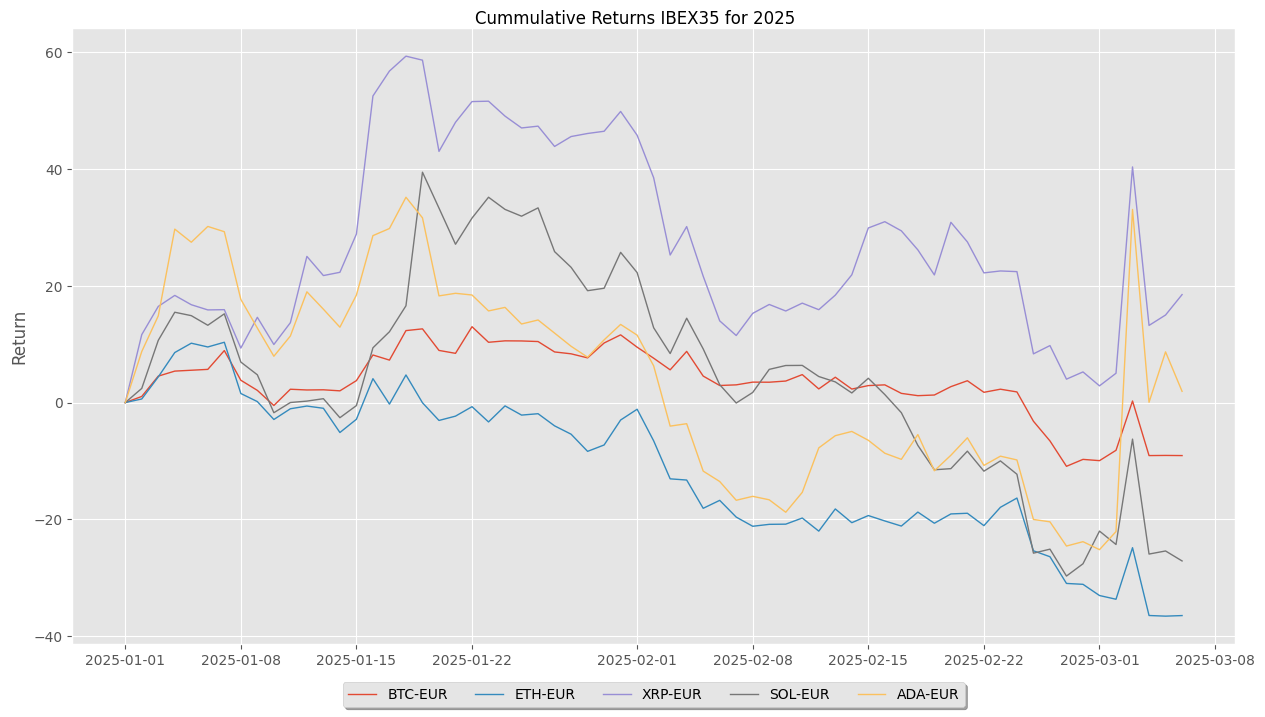

In [43]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [44]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/5 [00:00<?, ?it/s]

In [45]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/5 [00:00<?, ?it/s]

,Date,Ticker,Cummulative_Return
0,2025-03-06,XRP-EUR,18.485617
1,2025-03-06,ADA-EUR,1.926983
2,2025-03-06,BTC-EUR,-9.071036
3,2025-03-06,SOL-EUR,-27.111095
4,2025-03-06,ETH-EUR,-36.460734
